## Problem 1

In [14]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the text file
Y = iris[:,-1] # target value (iris species) is the last column
X = iris[:,0:-1] # features are the other columns
X.shape

(148L, 4L)

148L is the number of data points and 4L is number of features

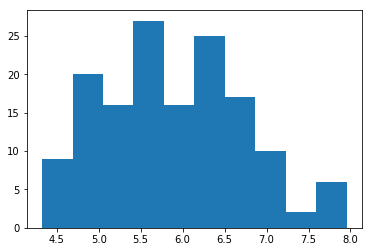

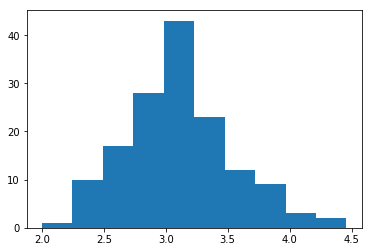

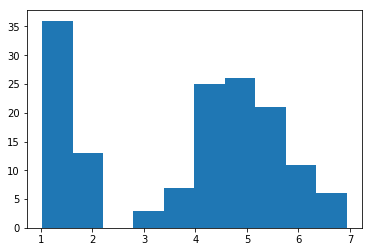

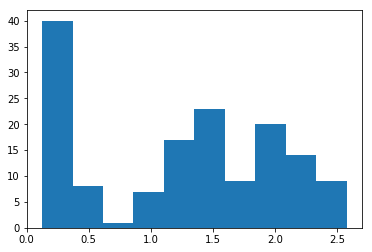

In [15]:
for i in range(4):
    plt.hist(X[:,i])
    plt.show()

In [16]:
for i in range(4):
    print("Feature", i, "mean: ", np.mean(X[:,i]), "std dev: ", np.std(X[:,i]))

('Feature', 0, 'mean: ', 5.900103764189188, 'std dev: ', 0.83340206677489403)
('Feature', 1, 'mean: ', 3.0989309168918919, 'std dev: ', 0.43629183800107685)
('Feature', 2, 'mean: ', 3.8195548405405404, 'std dev: ', 1.7540571093439352)
('Feature', 3, 'mean: ', 1.2525554845945945, 'std dev: ', 0.75877245702632468)


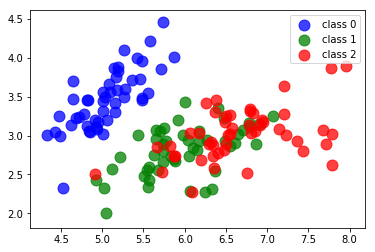

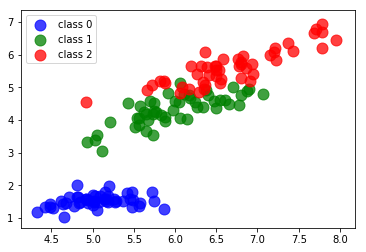

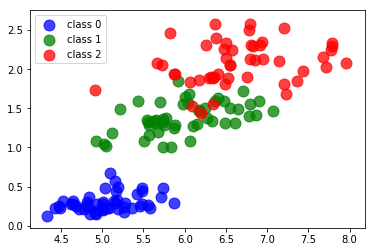

In [17]:
colors = ['blue', 'green', 'red']

for i, c in enumerate(np.unique(iris[:, -1])):
    mask = iris[:, -1] == c  # Finding the right points
    plt.scatter(iris[mask, 0], iris[mask, 1], s=120, c=colors[i], alpha=0.75, label='class %d' % i)

plt.legend()
plt.show()

for i, c in enumerate(np.unique(iris[:, -1])):
    mask = iris[:, -1] == c  # Finding the right points
    plt.scatter(iris[mask, 0], iris[mask, 2], s=120, c=colors[i], alpha=0.75, label='class %d' % i)

plt.legend()
plt.show()

colors = ['blue', 'green', 'red']

for i, c in enumerate(np.unique(iris[:, -1])):
    mask = iris[:, -1] == c  # Finding the right points
    plt.scatter(iris[mask, 0], iris[mask, 3], s=120, c=colors[i], alpha=0.75, label='class %d' % i)

plt.legend()
plt.show()

## Problem 2

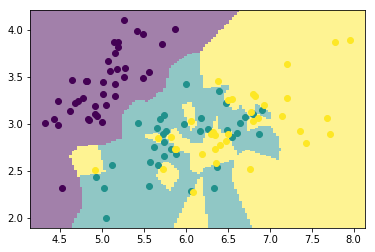

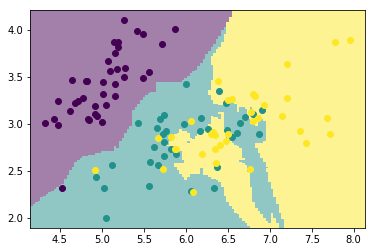

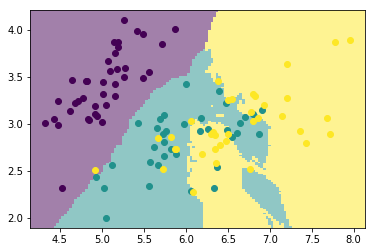

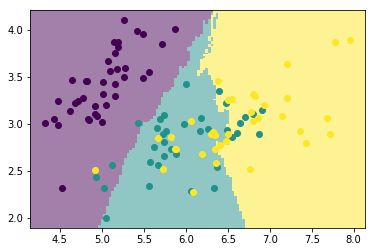

In [18]:
iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the data
Y = iris[:,-1]
X = iris[:,0:2]
# Note: indexing with ":" indicates all values (in this case, all rows);
# indexing with a value ("0", "1", "-1", etc.) extracts only that value (here, columns);
# indexing rows/columns with a range ("1:-1") extracts any row/column in that range.

import mltools as ml
# We'll use some data manipulation routines in the provided class code
# Make sure the "mltools" directory is in a directory on your Python path, e.g.,
# export PYTHONPATH=$\$${PYTHONPATH}:/path/to/parent/dir
# or add it to your path inside Python:
# import sys
# sys.path.append('/path/to/parent/dir/');

np.random.seed(0) # set the random number seed
X,Y = ml.shuffleData(X,Y); # shuffle data randomly
# (This is a good idea in case your data are ordered in some systematic way.)

Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75) # split data into 75/25 train/validation

for i in [1,5,10,50]:
    knn = ml.knn.knnClassify() # create the object and train it
    knn.train(Xtr, Ytr, i) # where K is an integer, e.g. 1 for nearest neighbor prediction
    YvaHat = knn.predict(Xva) # get estimates of y for each data point in Xva

    ml.plotClassify2D( knn, Xtr, Ytr )
    plt.show()

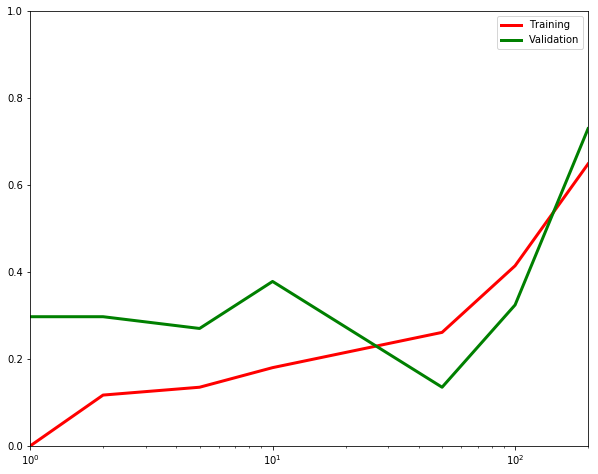

In [19]:
import mltools as ml

K=[1,2,5,10,50,100,200]
errTrain = [0, 0, 0 ,0 ,0 ,0 ,0]
errTrain2 = [0, 0, 0, 0, 0, 0, 0]

for i,k in enumerate(K):
    knn = ml.knn.knnClassify()
    knn.train(Xtr, Ytr, k) 
    YvaHat = knn.predict(Xva) 
    errTrain[i] = knn.err(Xtr,Ytr)
    
for i,k in enumerate(K):
    knn = ml.knn.knnClassify()
    knn.train(Xtr, Ytr, k) 
    YvaHat = knn.predict(Xtr) 
    errTrain2[i] = knn.err(Xva,Yva)
    
    
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.semilogx(K, errTrain, 'r-', lw=3, label='Training')
ax.semilogx(K, errTrain2, 'g-', lw=3, label='Validation')

ax.legend()

# Controlling the axis.
ax.set_xlim(0, 200)
ax.set_ylim(0, 1)

# And still doing this to clean the canvas.
plt.show()

K = 5 is best is because validation error is lowest without the training error being too high, 2 is also an okay option.

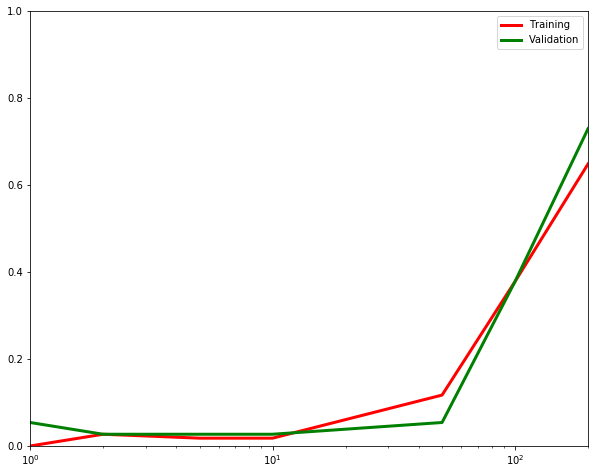

In [20]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the data
Y = iris[:,-1]
X = iris[:,0:-1]
# Note: indexing with ":" indicates all values (in this case, all rows);
# indexing with a value ("0", "1", "-1", etc.) extracts only that value (here, columns);
# indexing rows/columns with a range ("1:-1") extracts any row/column in that range.

import mltools as ml
np.random.seed(0) # set the random number seed
X,Y = ml.shuffleData(X,Y); # shuffle data randomly
# (This is a good idea in case your data are ordered in some systematic way.)

Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75) # split data into 75/25 train/validation

K=[1,2,5,10,50,100,200]
errTrain = [0, 0, 0 ,0 ,0 ,0 ,0]
errTrain2 = [0, 0, 0, 0, 0, 0, 0]

for i,k in enumerate(K):
    knn = ml.knn.knnClassify()
    knn.train(Xtr, Ytr, k) 
    YvaHat = knn.predict(Xva) 
    errTrain[i] = knn.err(Xtr,Ytr)
    
for i,k in enumerate(K):
    knn = ml.knn.knnClassify()
    knn.train(Xtr, Ytr, k) 
    YvaHat = knn.predict(Xtr) 
    errTrain2[i] = knn.err(Xva,Yva)
    
    
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.semilogx(K, errTrain, 'r-', lw=3, label='Training')
ax.semilogx(K, errTrain2, 'g-', lw=3, label='Validation')

ax.legend()

# Controlling the axis.
ax.set_xlim(0, 200)
ax.set_ylim(0, 1)

# And still doing this to clean the canvas.
plt.show()


The best K is 10 because it is the sweet spot right before the error starts to increase, the training error is lowest and we are beyond the point of overfitting and almost close to underfitting if we increase K. We could also use 5. The difference between my other prediction from previous problem is that there are more datapoints, meaning that a higher K is needed and also, our error rates are much lower.

## Problem 3

1. p(y=1) = 4/10 , p(y=-1) = 6/10

   p(x1=1|y=1)= 3/4, p(x1=0|y=1) = 1/4
   
   p(x1=1|y=-1)=3/6, p(x1=0|y=-1) = 3/6
   
   p(x2=1|y=1)= 0/4, p(x2=0|y=1) = 4/4
   
   p(x2=1|y=-1)= 5/6, p(x2=0|y=-1) = 1/6
   
   p(x3=1|y=1)= 3/4, p(x3=0|y=1) = 1/4
   
   p(x3=1|y=-1) = 4/6, p(x3=0|y=-1) = 2/6
   
   p(x4=1|y=1)= 2/4, p(x4=0|y=1) = 2/4
   
   p(x4=1|y=-1)= 5/6, p(x4=0|y=-1) 1/6
   
   p(x5=1|y=1)= 1/4, p(x5=0|y=1) = 3/4
   
   p(x5=1|y=-1)=2/6, p(x5=0|y=-1) = 4/6
   
2. for x = (0,0,0,0,0) y = 1 using problem 3.3 this would be classified as y = 1

   for x = (1 1 0 1 0) y = -1 using problem 3.3 
   
3. p(x1=0|y=1) * p(x2=0|y=1) * ... * p(x5=0|y=1) * p(y=1) = 1/4 * 4/4 * 1/4 * 2/4 * 3/4 * 4/10 = 0.009375

   p(x1=0|y=-1) * p(x2=0 | y=-1) * ... * p(x5=0|y=1) * p(y=-1) = 3/6 * 1/6 * 2/6 * 1/6 * 4/6 * 6/10 = 0.00185185185
   
   0.009375 > 0.001815... so problem 3.2 y = 1
   1 > 0 so problem
   p(y=1|x1=0,x2=0,x3=0,x4=0,x5=0) = 0.009375 / (0.00185185185 + 0.009375) = 0.83505154652 = 83.5%
   
   p(y=1|x1=1,x2=1,x3=0,x4=1,x5=0) = 0% because p(x2=1|y=1) = 0/4 . According to piazza, we do not need to fix the zero-   frequency problem. However, if we were, a common fix is to add +1 to everything.
   
4. To avoid overfitting, and making calculations easier, we ignore the denominator and assume conditional independence of the feature and use an approximation instead. The denominator is used for normalization, removing it won't affect anything. It is proven that ignoring it will give a very close approximation.

5. We have to retrain the classifier if you want to classify solely based on the other features because the current classifier is affected by the author feature. Since we have conditional independence, we can divide the calculations. For example, if we want to remove p(x1=0|y=1) from problem 3.3, we just divide 1/4 from the answer.

## Problem 4

I did not collaborate with anyone except look at piazza posts and recitation notes. Piazza posts I looked at were https://piazza.com/class/jc52w8o89t5qr?cid=57 and https://piazza.com/class/jc52w8o89t5qr?cid=37 for referring to professor's answer that we do not need to calculate 